# Introduction:

![VW cars](https://wallpapercave.com/wp/wp2170192.jpg)

In this analysis, I have done a basic EDA of features and I have selected k-best features out of both linear features and from polynomial features and have applied regression on top of it to find the maximum r_squared value that I am able to acheive from the data.

1. Introduction
2. Importing dataset and exploration
3. Exploratory data analysis
4. Pre-processing for modeling
5. Modeling
6. Backward selection for variable selection on linear regression
7. Polynomial features for modeling
8. Conclusion

Importing the packages needed for the analysis. I usually like to import the packages in the alphabetical order, so that it is easy for reviewing if needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)

# Importing dataset and exploration

There are many files in the input folder for each of the car brands. We will import the file that is with VW naming on it.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv


In [3]:
data_vw = pd.read_csv("/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv")
print(data_vw.shape)
data_vw.head()

(15157, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


Seeing if there are any missing values in the records

In [4]:
data_vw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Nice :) it is a nice and clean data, very good one to work with!

In [5]:
data_vw.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


# Exploratory data analysis

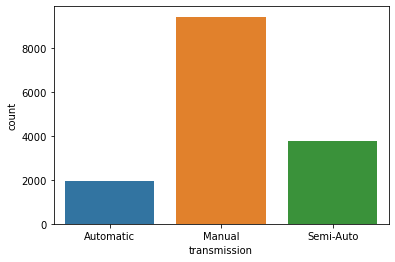

In [6]:
sns.countplot(data_vw["transmission"])

Most of the cars on the dataset are with manual transmission with very few cars in automatic and seim automatic transmission

 Golf               0.320842
 Polo               0.216863
 Tiguan             0.116448
 Passat             0.060368
 Up                 0.058323
 T-Roc              0.048360
 Touareg            0.023949
 Touran             0.023224
 T-Cross            0.019793
 Golf SV            0.017682
 Sharan             0.017154
 Arteon             0.016362
 Scirocco           0.015966
 Amarok             0.007323
 Caravelle          0.006664
 CC                 0.006268
 Tiguan Allspace    0.006004
 Beetle             0.005476
 Shuttle            0.004025
 Caddy Maxi Life    0.003893
 Jetta              0.002111
 California         0.000990
 Caddy Life         0.000528
 Eos                0.000462
 Caddy              0.000396
 Fox                0.000264
 Caddy Maxi         0.000264
Name: model, dtype: float64


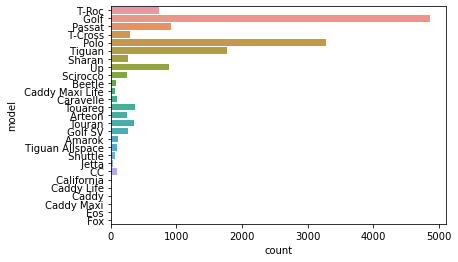

In [7]:
print(data_vw["model"].value_counts() / len(data_vw))
sns.countplot(y = data_vw["model"])

Top 3 cars are Golf, Polo and Tiguan on the dataset constuite 64% of all the VW cars, with all other cars contributing to 36%

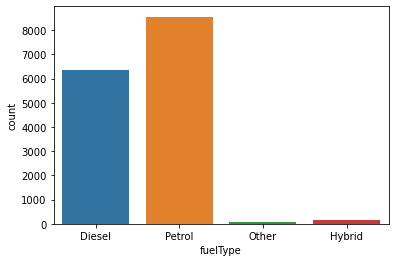

In [8]:
sns.countplot(data_vw["fuelType"])

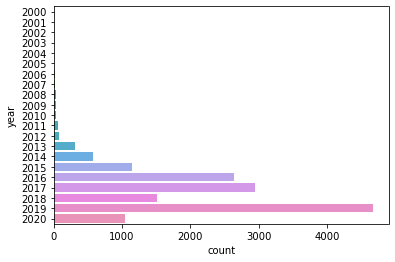

In [9]:
sns.countplot(y = data_vw["year"])

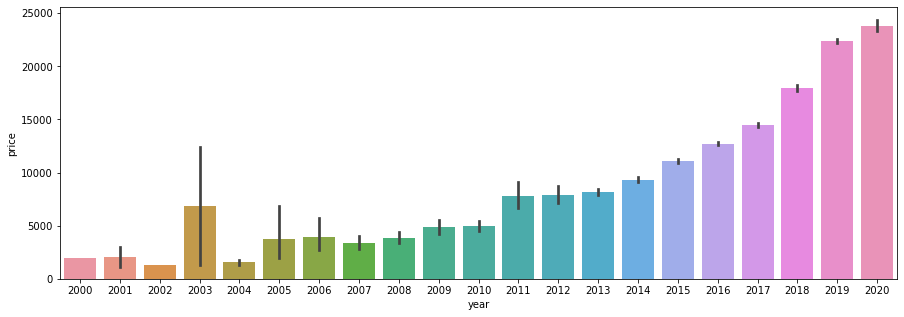

In [10]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = data_vw["year"], y = data_vw["price"])

The recently manufactured cars (year = 2018, 2019) are sold for more average price when compared to the cars that are manufactured earlier.

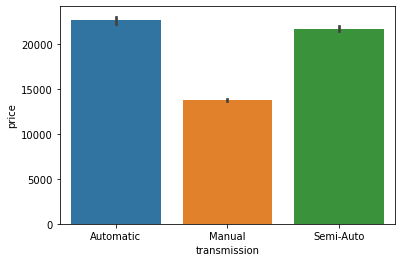

In [11]:
sns.barplot(x = data_vw["transmission"], y = data_vw["price"])

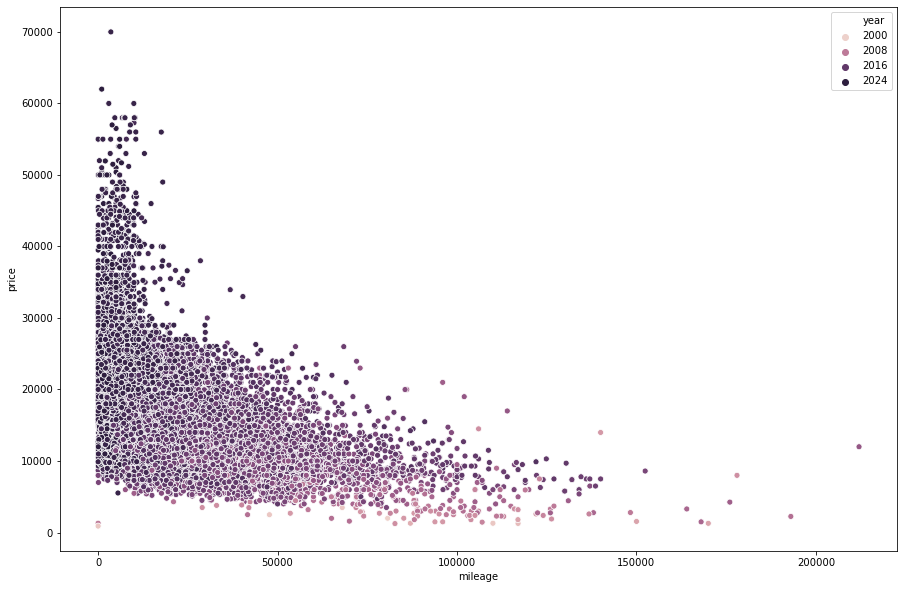

In [12]:
plt.figure(figsize=(15,10),facecolor='w') 
sns.scatterplot(data_vw["mileage"], data_vw["price"], hue = data_vw["year"])

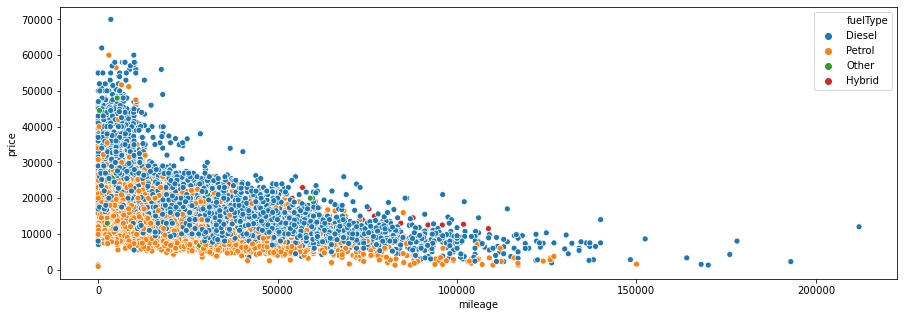

In [13]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(data_vw["mileage"], data_vw["price"], hue = data_vw["fuelType"])

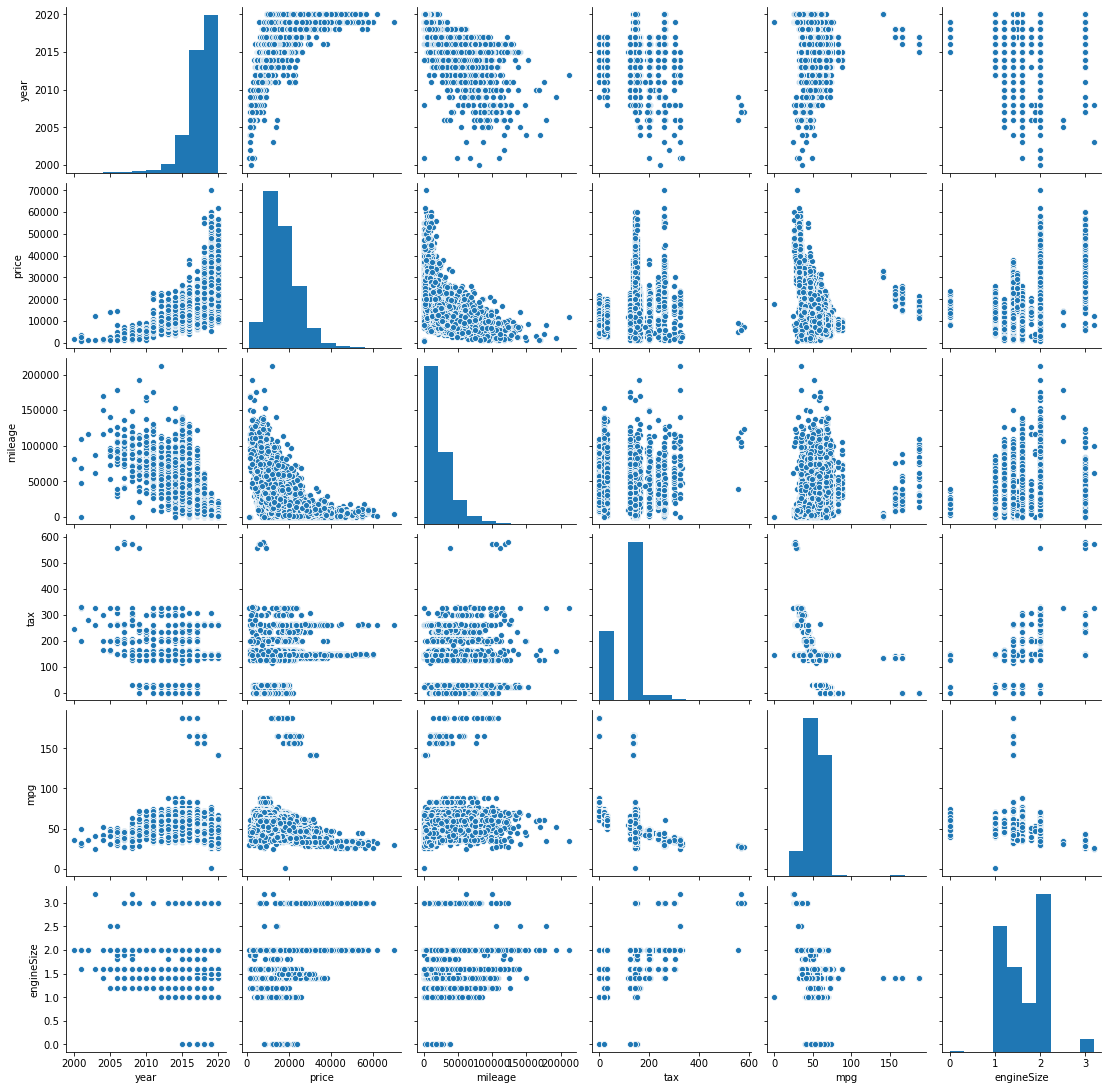

In [14]:
sns.pairplot(data_vw)

Now I am computing a age field, subtracting 2020 from the year field and dropping the year field

In [15]:
data_vw["age_of_car"] = 2020 - data_vw["year"]
data_vw = data_vw.drop(columns = ["year"])
data_vw.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
3867,Golf,12490,Semi-Auto,38254,Diesel,30,62.8,2.0,4
9034,Polo,12290,Semi-Auto,12966,Petrol,20,60.1,1.2,4
2688,Golf,14291,Semi-Auto,57600,Diesel,30,62.8,2.0,4
2464,Golf,14995,Manual,41328,Diesel,20,67.3,2.0,4
11950,Sharan,19491,Manual,14811,Diesel,145,56.5,2.0,3
3164,Golf,13750,Manual,32152,Petrol,150,54.3,1.4,2
12788,Up,10000,Manual,2000,Petrol,145,54.3,1.0,0
5950,Passat,12310,Manual,33632,Diesel,145,70.6,1.6,2
10786,Tiguan,17940,Manual,19044,Diesel,150,58.9,2.0,2
7158,Polo,7498,Manual,27541,Petrol,20,60.1,1.0,6


# Pre-processing for modeling

I like to use pd.get_dummies option over OHE in SKLearn to get the one hot encoded variables for the categorical variables. It is usually tidy on the dataset and the column names are preserved.

In [16]:
data_vw_expanded = pd.get_dummies(data_vw)
data_vw_expanded.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


Applying the standard scalar option to standardize all the variables in the dataset.

In [17]:
std = StandardScaler()
data_vw_expanded_std = std.fit_transform(data_vw_expanded)
data_vw_expanded_std = pd.DataFrame(data_vw_expanded_std, columns = data_vw_expanded.columns)
print(data_vw_expanded_std.shape)
data_vw_expanded_std.head()

(15157, 40)


,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,1.052392,-0.387209,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
1,1.295211,-0.828948,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
2,0.407627,-0.694090,0.508120,-0.245816,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
3,2.147462,-0.816512,0.508120,-1.557966,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,-0.851661,-0.09828,-0.075981,0.878707
4,0.781591,-0.737309,0.586884,-1.022843,-0.218101,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707


In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_vw_expanded_std.drop(columns = ['price']), data_vw_expanded_std[['price']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11367, 39)
(3790, 39)
(11367, 1)
(3790, 1)


# Modeling

## Selecting best features for model

Since ther are 40 variables in the dataset after the one hot encoding, I am using SelectKBest option from sklearn to select the best features from the dataset for applying the regression.

For this, I am executing the SelectKBest() on f_regression by taking into consideration from 3 variables to 40 variables to see where we get the best score. 



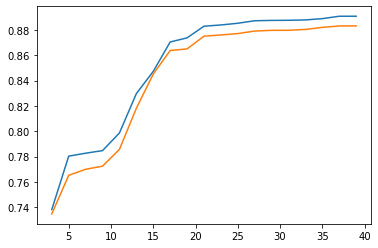

In [19]:
column_names = data_vw_expanded.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(3, 40, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

We get score of 0.88 around 23 variables befor the curve stablizes. Hence keeping k as 23 selecting 23 best variables from the dataset

In [20]:
selector = SelectKBest(f_regression, k = 23)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ Amarok',
       'model_ Arteon', 'model_ Beetle', 'model_ California',
       'model_ Caravelle', 'model_ Polo', 'model_ Sharan', 'model_ T-Roc',
       'model_ Tiguan', 'model_ Tiguan Allspace', 'model_ Touareg',
       'model_ Up', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [21]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

In [22]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,LinearRegression(),0.876051
1,Linear,Ridge(),0.876049
2,Linear,Lasso(),-0.000284
3,Linear,SVR(),0.936809
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.949543
5,Linear,MLPRegressor(),0.941925


The best score we are getting is on a RandomForestRegressor() with a score of 0.9513

# Backward selection for variable selection on linear regression

Fitting a linear regression model and checking the model parameters

In [23]:
regressor = sm.OLS(y_train, X_train).fit()
print(regressor.summary())

X_train_dropped = X_train.copy()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              2568.
Date:                Sun, 06 Sep 2020   Prob (F-statistic):                        0.00
Time:                        04:47:25   Log-Likelihood:                         -3566.8
No. Observations:               11367   AIC:                                      7206.
Df Residuals:                   11331   BIC:                                      7470.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [24]:
while True:
    if max(regressor.pvalues) > 0.05:
        drop_variable = regressor.pvalues[regressor.pvalues == max(regressor.pvalues)]
        print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
        X_train_dropped = X_train_dropped.drop(columns = [drop_variable.index[0]])
        regressor = sm.OLS(y_train, X_train_dropped).fit()
    else:
        print("All p values less than 0.05")
        break

Dropping model_ Caddy and running regression again because pvalue is: 0.5301115731782016
Dropping model_ Passat and running regression again because pvalue is: 0.7296964882269741
Dropping model_ Beetle and running regression again because pvalue is: 0.7030652840022031
Dropping model_ Golf and running regression again because pvalue is: 0.7013666135192905
Dropping model_ Caddy Maxi and running regression again because pvalue is: 0.16949520391314501
Dropping model_ Eos and running regression again because pvalue is: 0.060353218646930724
Dropping model_ Caddy Life and running regression again because pvalue is: 0.052529813550711416
All p values less than 0.05


8 variables are dropped because p value is higher than our alpha level of 0.05. We fit the model with the remaining variables and see the summary below. 

We can see a slight improvement over the linear regression in our earlier step with SKLearn fit which yielded a r_squared value of 0.87, this vies us a r_square value of 0.89

In [25]:
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              3081.
Date:                Sun, 06 Sep 2020   Prob (F-statistic):                        0.00
Time:                        04:47:25   Log-Likelihood:                         -3571.6
No. Observations:               11367   AIC:                                      7203.
Df Residuals:                   11337   BIC:                                      7423.
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

## Fitting on polynomial features

I would like to explore the dataset a bit further to see if a polynomial variable model is performing better on the same models. 

I am using PolynomialFeatures() to engineer polynomial features from the dataset. 
We have around 820 features from PolynomialFeatures(), so again using SelectKBest to see how much is our optimum feature set size

(11367, 820)


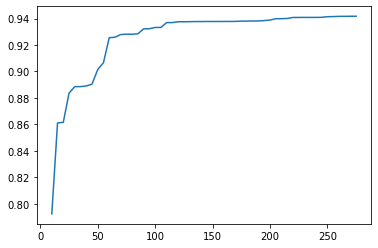

In [26]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

no_of_features = []
r_squared = []

for k in range(10, 277, 5):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared.append(regressor.score(X_train_transformed, y_train))
    
sns.lineplot(x = no_of_features, y = r_squared)

From the above graph we can see that we are hitting 0.93 score around 110 features.

In [27]:
selector = SelectKBest(f_regression, k = 110)
X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

In [28]:
models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,LinearRegression(),0.876051
1,Linear,Ridge(),0.876049
2,Linear,Lasso(),-0.000284
3,Linear,SVR(),0.936809
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.949543
5,Linear,MLPRegressor(),0.941925
6,Polynomial,LinearRegression(),-6.265739
7,Polynomial,Ridge(),0.928250
8,Polynomial,Lasso(),0.132059
9,Polynomial,SVR(),0.944615


# Conclusion:
I got maximum r^2 score of 0.955 for polynomian data on RandomForest regressor. 

As next steps, I can concentrate on individual features, and make some transformations such as log transforms on each of the features to make the model perform even better.

Please upvote the notebook if you liked it, and leave me a feedback if you think something could have been better.

# References:
1. https://medium.com/@mayankshah1607/machine-learning-feature-selection-with-backward-elimination-955894654026